In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal as ssig
import seaborn as sns

In [53]:
# Importing the data 
data = pd.read_excel('..//ref_data.xlsx')
df = data
print(data.shape)
data.head()

(14402, 10)


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,Datetime,Refrigeration Unit - 1,NaN,Refrigeration Unit - 2,NaN,Refrigeration Unit - 3,NaN,Refrigeration Unit - 4,NaN
1,NaN,NaN,Power,Temperature,Power,Temperature,Power,Temperature,Power,Temperature
2,NaN,2017-08-01 00:00:00,2.2585,4.81,3.231,0.495,0,8.93,0.308,3.34
3,NaN,2017-08-01 00:01:00,2.2035,3.9,3.188,0.245,0,8.9,1.338,3.435
4,NaN,2017-08-01 00:02:00,2.13,3.155,3.1845,0,0,8.87,2.3695,2.715


In [54]:
# Deleting Unnamed: 0 column consisting of NaN values
del df['Unnamed: 0']

In [55]:
# Renaming the columns
df.columns = ['Datetime', 'R1power', 'R1temp', 'R2power', 'R2temp', 'R3power', 'R3temp', 'R4power', 'R4temp']
df.head()

,Datetime,R1power,R1temp,R2power,R2temp,R3power,R3temp,R4power,R4temp
0,Datetime,Refrigeration Unit - 1,NaN,Refrigeration Unit - 2,NaN,Refrigeration Unit - 3,NaN,Refrigeration Unit - 4,NaN
1,NaN,Power,Temperature,Power,Temperature,Power,Temperature,Power,Temperature
2,2017-08-01 00:00:00,2.2585,4.81,3.231,0.495,0,8.93,0.308,3.34
3,2017-08-01 00:01:00,2.2035,3.9,3.188,0.245,0,8.9,1.338,3.435
4,2017-08-01 00:02:00,2.13,3.155,3.1845,0,0,8.87,2.3695,2.715


In [56]:
# Dropping first two rows from the dataframe
df = df.drop([0, 1])
df

,Datetime,R1power,R1temp,R2power,R2temp,R3power,R3temp,R4power,R4temp
2,2017-08-01 00:00:00,2.2585,4.81,3.231,0.495,0,8.93,0.308,3.34
3,2017-08-01 00:01:00,2.2035,3.9,3.188,0.245,0,8.9,1.338,3.435
4,2017-08-01 00:02:00,2.13,3.155,3.1845,0,0,8.87,2.3695,2.715
5,2017-08-01 00:03:00,2.1425,2.715,3.1695,-0.215,0,8.81,2.2265,2.125
6,2017-08-01 00:04:00,1.225,2.31,3.1735,-0.495,0,8.81,2.231,1.745
...,...,...,...,...,...,...,...,...,...
14397,2017-08-10 23:55:00,1.2655,4.84,0,16.465,2.27,3.68,0.3095,1.435
14398,2017-08-10 23:56:00,2.2785,4.685,0,16.5,2.4695,3.465,0.309,1.93
14399,2017-08-10 23:57:00,2.149,3.9,0,16.5,2.4275,2.935,0.309,2.62
14400,2017-08-10 23:58:00,2.147,3.275,0,16.53,2.413,2.375,0.309,3.155


In [57]:
def filling_nan(value):
    df[value] = df[value].fillna(method = 'ffill')

filling_nan('R1power')
filling_nan('R2power')
filling_nan('R2temp')
filling_nan('R3power')
filling_nan('R4power')
filling_nan('R4temp')

In [58]:
df.isna().sum()

Datetime    0
R1power     0
R1temp      0
R2power     0
R2temp      0
R3power     0
R3temp      0
R4power     0
R4temp      0
dtype: int64

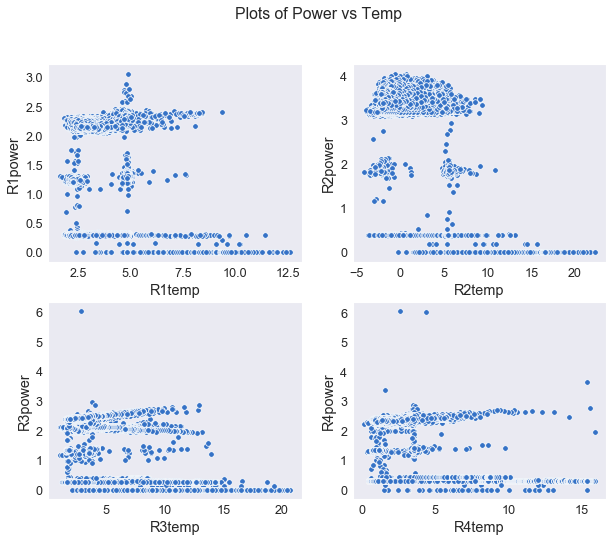

In [102]:
fig, axs = plt.subplots(2, 2, figsize = (10, 8))
fig.suptitle('Plots of Power vs Temp')
sns.scatterplot(ax = axs[0, 0], data = df, x = 'R1temp', y = 'R1power')
sns.scatterplot(ax = axs[0, 1], data = df, x = 'R2temp', y = 'R2power')
sns.scatterplot(ax = axs[1, 0], data = df, x = 'R3temp', y = 'R3power')
sns.scatterplot(ax = axs[1, 1], data = df, x = 'R4temp', y = 'R4power')
sns.set_style(style = 'darkgrid')

In [60]:
# dropping the outliers with Rxtemp values greater than 80
def drop_outliers(temp):
    df.drop(df[df[temp]>80].index, inplace = True)

drop_outliers('R1temp')
drop_outliers('R2temp')
drop_outliers('R3temp')
drop_outliers('R4temp')
print(df.shape)

(14389, 9)


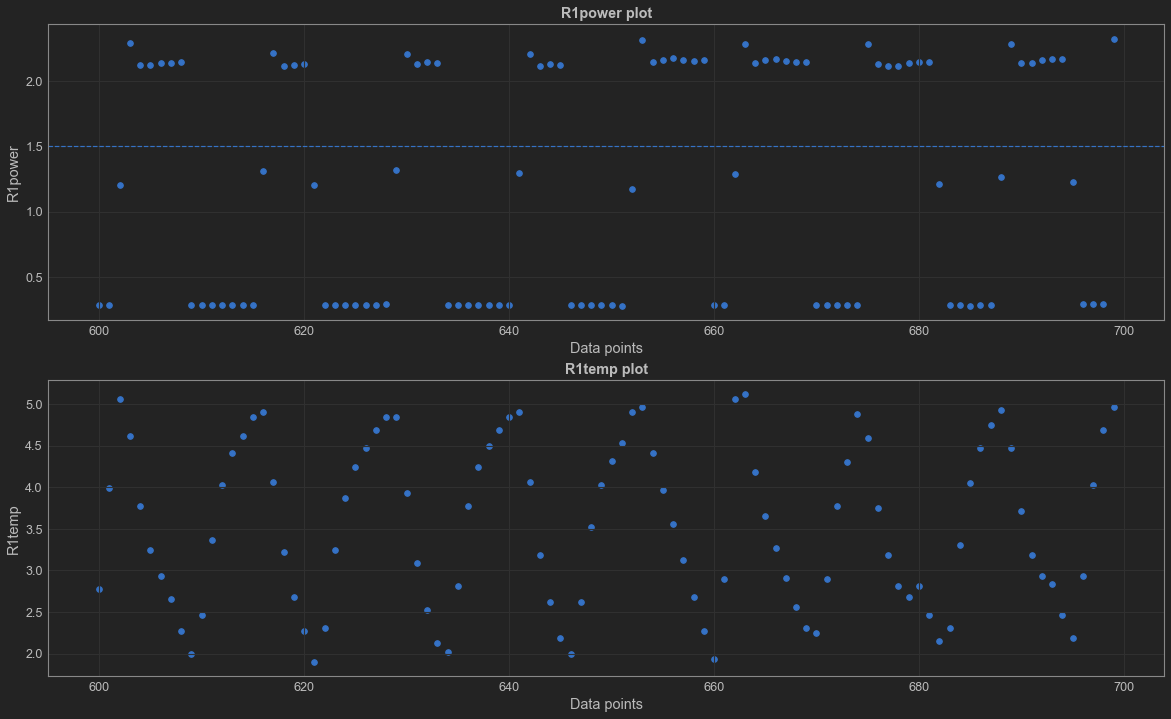

In [80]:
# to calculate the temp range
def plots(power, temp):
    fig, ax = plt.subplots(2, 1, figsize = (20,12))
    l, h = 600, 700
    ax[0].scatter(np.arange(l,h), df[power][l:h], lw = 1)
    ax[0].set_title('{} plot'.format(power), fontweight = 'bold')
    ax[0].set_xlabel('Data points')
    ax[0].set_ylabel('{}'.format(power))
    ax[0].axhline(y = 1.5, linestyle = '--')
    ax[1].scatter(np.arange(l,h), df[temp][l:h], lw = 1)
    ax[1].set_title('{} plot'.format(temp), fontweight = 'bold')
    ax[1].set_xlabel('Data points')
    ax[1].set_ylabel('{}'.format(temp))
#     plt.grid(b = None)
    
plots('R1power', 'R1temp')

**Stats for R1temp**
mean is 2.4051058891789316
median is 2.28
**Stats for R2temp**
mean is -0.7728350515463918
median is -1.73
**Stats for R3temp**
mean is 2.8320901639344283
median is 1.84
**Stats for R4temp**
mean is 1.4097001620745617
median is 1.245


Text(0.5, 0.98, 'Temperature plots for finding the local minima and threshold')

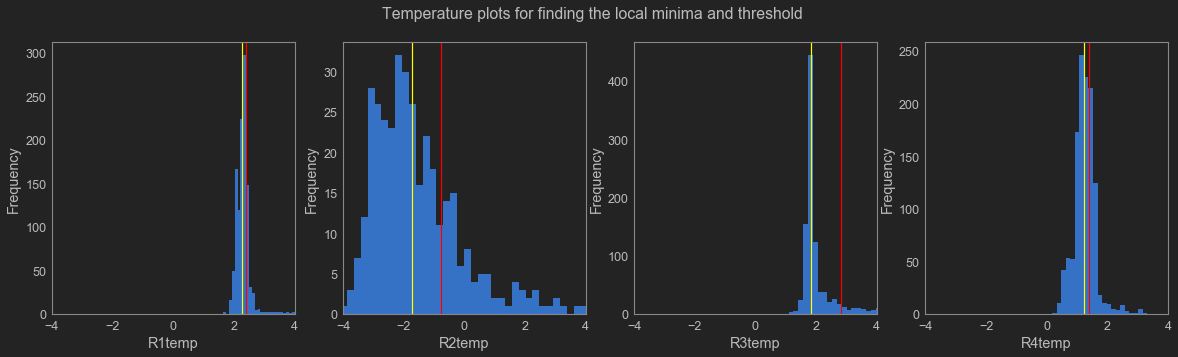

In [82]:
# to calculate the lower threshold of the set temperature range
def lower_thresh(temp, ax):
    idxs, = ssig.argrelmin(df[temp].values, order = 2)
    idxs
    R_minvalues = df[temp].values[idxs]
    ax.hist(R_minvalues, bins = 100)
    ax.set_xlim(-4, 4)
    ax.set_xlabel('{}'.format(temp))
    ax.set_ylabel('Frequency')
    ax.axvline(np.mean(R_minvalues), c = 'red')
    ax.axvline(np.median(R_minvalues), c = 'yellow')
    ax.grid(False)
    print('mean is {}'.format(np.mean(R_minvalues)))
    print('median is {}'.format(np.median(R_minvalues)))
    

fig, axes = plt.subplots(1, 4, figsize = (20, 5))

refr = ['R1temp', 'R2temp', 'R3temp', 'R4temp']
# for i, rlabel in enumerate(refr):
#     print(i)
#     upper_thresh(rlabel, axes[i])
    
for i in range(0, 4):
    print('**Stats for {}**'.format(refr[i]))
    lower_thresh(refr[i], axes[i])

fig.suptitle('Temperature plots for finding the local minima and threshold')

**Stats for R1temp**
Mean is 4.965282095567095
Median is 4.84
**Stats for R2temp**
Mean is 4.113981958762887
Median is 5.34
**Stats for R3temp**
Mean is 4.530214025500917
Median is 3.56
**Stats for R4temp**
Mean is 3.8528676664035912
Median is 3.56


Text(0.5, 0.98, 'Temperature plot for finding the local maxima and threshold')

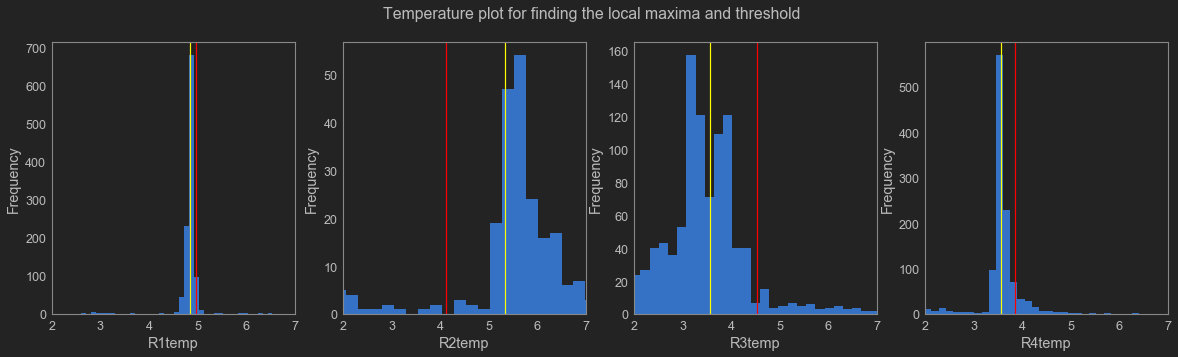

In [83]:
# to calculate the upper threshold of the set temperature range
def upper_thresh(temp, ax):
    idxs, = ssig.argrelmax(df[temp].values, order = 2)
    idxs
    R_minvalues = df[temp].values[idxs]
    ax.hist(R_minvalues, bins = 100)
    ax.set_xlim(2, 7)
    ax.set_xlabel('{}'.format(temp))
    ax.set_ylabel('Frequency')
    ax.axvline(np.mean(R_minvalues), c = 'red')
    ax.axvline(np.median(R_minvalues), c = 'yellow')
    ax.grid(False)
    print('Mean is {}'.format(np.mean(R_minvalues)))
    print('Median is {}'.format(np.median(R_minvalues)))

fig, axes = plt.subplots(1, 4, figsize = (20, 5))

refr = ['R1temp', 'R2temp', 'R3temp', 'R4temp']
# for i, rlabel in enumerate(refr):
#     print(i)
#     upper_thresh(rlabel, axes[i])
    
for i in range(0, 4):
    print('**Stats for {}**'.format(refr[i]))
    upper_thresh(refr[i], axes[i])

fig.suptitle('Temperature plot for finding the local maxima and threshold')

In [64]:
# to calculate duty cycle
system_duty = []
def duty_cycle(power, llim, ulim):
    on_duration = np.mean(df[power].between(llim, ulim, inclusive = 'both'))
    total_duration = np.mean(df[power].between(0, ulim, inclusive = 'right'))
    duty_value = float(on_duration / total_duration)*100
    system_duty.append(duty_value)
    return duty_value


print('Duty cycle of regrigerator 1 is {}'.format(duty_cycle('R1power', 1.5, 3)))
print('Duty cycle of regrigerator 2 is {}'.format(duty_cycle('R2power', 2.5, 4)))
print('Duty cycle of regrigerator 3 is {}'.format(duty_cycle('R3power', 1.75, 3)))
print('Duty cycle of regrigerator 4 is {}'.format(duty_cycle('R4power', 1.75, 2.5)))

Duty cycle of regrigerator 1 is 39.94995829858215
Duty cycle of regrigerator 2 is 44.61591936044491
Duty cycle of regrigerator 3 is 67.73005282179594
Duty cycle of regrigerator 4 is 47.99321650650084


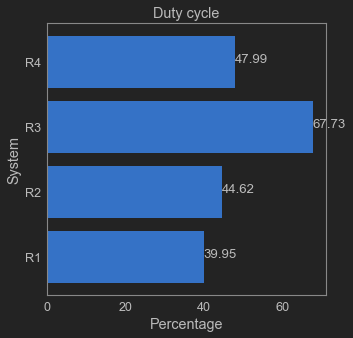

In [84]:
system = ['R1', 'R2', 'R3', 'R4']
plt.figure(figsize = (5, 5))
plt.barh(system, system_duty)
plt.title('Duty cycle')
plt.ylabel('System')
plt.xlabel('Percentage')
plt.grid(b = None)
for index, value in enumerate(system_duty):
    plt.text(value, index, str(round(value, 2)))

In [66]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [67]:
df_power = df.filter(like='power')
df_power['Date'] = df['Datetime'].dt.date
energy_consumption = df_power.groupby('Date').sum() * 60
energy_consumption

C:\Users\proto\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,R1power,R2power,R3power,R4power
Date,,,,
2017-08-01,103155.51,144068.21,131012.85,112410.78
2017-08-02,98436.12,138811.71,139455.63,120046.77
2017-08-03,93832.92,143755.95,136404.09,111050.13
2017-08-04,100818.93,150991.02,134813.43,104022.63
2017-08-05,97261.11,195907.32,145430.19,111978.72
2017-08-06,107297.31,154225.18,140583.06,128668.68
2017-08-07,93327.99,140178.66,98420.43,135724.41
2017-08-08,91582.50,150128.43,155360.25,119539.29
2017-08-09,90514.32,140959.74,141971.74,125887.20


In [68]:
# average power consumed by refrigerators for 10 days
energy_avg_sys = energy_consumption.sum(0)/10
energy_avg_sys

R1power     96984.813
R2power    150882.567
R3power    138572.675
R4power    119225.346
dtype: float64

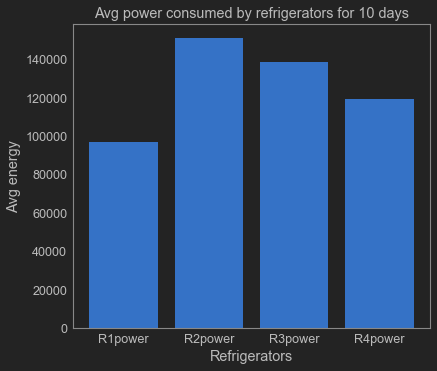

In [85]:
plt.bar(energy_consumption.columns, energy_avg_sys)
plt.title('Avg power consumed by refrigerators for 10 days')
plt.xlabel('Refrigerators')
plt.ylabel('Avg energy')
plt.grid(b = None)

In [70]:
# average daily energy consumption 
energy_avg_daily = energy_consumption.sum(1)/4
energy_avg_daily

Date
2017-08-01    122661.8375
2017-08-02    124187.5575
2017-08-03    121260.7725
2017-08-04    122661.5025
2017-08-05    137644.3350
2017-08-06    132693.5575
2017-08-07    116912.8725
2017-08-08    129152.6175
2017-08-09    124833.2500
2017-08-10    132155.2000
dtype: float64

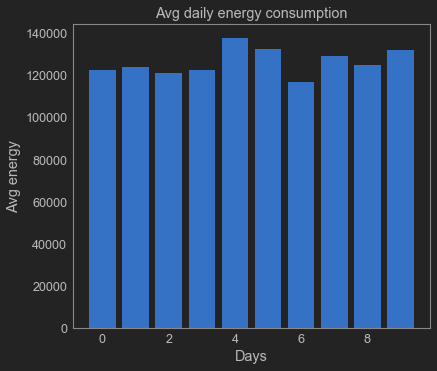

In [86]:
plt.bar(np.arange(len(energy_avg_daily)), energy_avg_daily)
plt.title('Avg daily energy consumption')
plt.xlabel('Days')
plt.ylabel('Avg energy')
plt.grid(b = None)

In [72]:
# calculate the percentage compliance of each refrigerator
compliance = []
def percent_compliance(temp, id):
#     print(df[temp].between(1, 4, inclusive = True))
    compliance.append(np.mean(df[temp].between(1, 4, inclusive = 'both')*100))
    print('Percentage compliance of refrigerator {} is {}'.format(id, np.mean(df[temp].between(1, 4, inclusive = True)*100)))
    
percent_compliance('R1temp', 1)
percent_compliance('R2temp', 2)
percent_compliance('R3temp', 3)
percent_compliance('R4temp', 4)

Percentage compliance of refrigerator 1 is 55.80651886858016
Percentage compliance of refrigerator 2 is 33.34491625547293
Percentage compliance of refrigerator 3 is 73.16005281812495
Percentage compliance of refrigerator 4 is 86.2255889915908


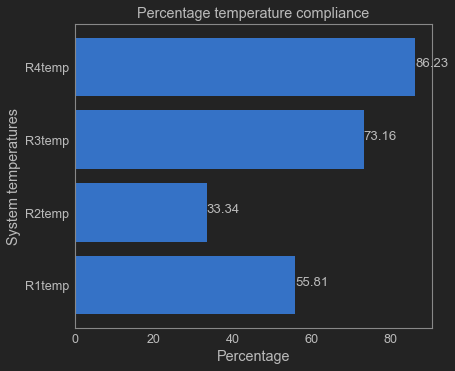

In [75]:
temp = ['R1temp', 'R2temp', 'R3temp', 'R4temp']
plt.barh(temp, compliance)
plt.title('Percentage temperature compliance')
plt.ylabel('System temperatures')
plt.xlabel('Percentage')
plt.grid(b = None)
for index, value in enumerate(compliance):
    plt.text(value, index, str(round(value, 2)))